In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("D:/win D/intership project content/project 4 IBM HR analytics/IBM-HR-Employee-Attrition.csv")
df.shape

(1470, 36)

In [ ]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'salary_slab '],
      dtype='object')

In [ ]:
new_df=df[['Age','Department','Education', 'EducationField','Gender','JobInvolvement','WorkLifeBalance','MonthlyIncome','PercentSalaryHike','YearsAtCompany','Attrition']]
new_df.head()

,Age,Department,Education,EducationField,Gender,JobInvolvement,WorkLifeBalance,MonthlyIncome,PercentSalaryHike,YearsAtCompany,Attrition
0,41,Sales,2,Life Sciences,Female,3,1,5993,11,6,Yes
1,49,Research & Development,1,Life Sciences,Male,2,3,5130,23,10,No
2,37,Research & Development,2,Other,Male,2,3,2090,15,0,Yes
3,33,Research & Development,4,Life Sciences,Female,3,3,2909,11,8,No
4,27,Research & Development,1,Medical,Male,3,3,3468,12,2,No


In [ ]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
la=LabelEncoder()
ss=StandardScaler()

In [ ]:
new_df['Department']=la.fit_transform(new_df['Department'])
new_df['EducationField']=la.fit_transform(new_df['EducationField'])
new_df['Gender']=la.fit_transform(new_df['Gender'])
#new_df['salary_slab ']=la.fit_transform(new_df['salary_slab '])
new_df['Attrition']=la.fit_transform(new_df['Attrition'])

ss.fit_transform(new_df)

C:\Users\suraj\AppData\Local\Temp\ipykernel_12184\3768959596.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Department']=la.fit_transform(new_df['Department'])
C:\Users\suraj\AppData\Local\Temp\ipykernel_12184\3768959596.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['EducationField']=la.fit_transform(new_df['EducationField'])
C:\Users\suraj\AppData\Local\Temp\ipykernel_12184\3768959596.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

array([[ 0.4463504 ,  1.40151234, -0.89168825, ..., -1.1505541 ,
        -0.16461311,  2.28090588],
       [ 1.32236521, -0.49381714, -1.86842575, ...,  2.12930601,
         0.48850773, -0.4384223 ],
       [ 0.008343  , -0.49381714, -0.89168825, ..., -0.0572674 ,
        -1.14429437,  2.28090588],
       ...,
       [-1.08667552, -0.49381714,  0.08504925, ...,  1.30934098,
        -0.16461311, -0.4384223 ],
       [ 1.32236521,  1.40151234,  0.08504925, ..., -0.33058907,
         0.32522752, -0.4384223 ],
       [-0.32016256, -0.49381714,  0.08504925, ..., -0.87723243,
        -0.49117353, -0.4384223 ]])

In [ ]:
new_df.head()

,Age,Department,Education,EducationField,Gender,JobInvolvement,WorkLifeBalance,MonthlyIncome,PercentSalaryHike,YearsAtCompany,Attrition
0,41,2,2,1,0,3,1,5993,11,6,1
1,49,1,1,1,1,2,3,5130,23,10,0
2,37,1,2,4,1,2,3,2090,15,0,1
3,33,1,4,1,0,3,3,2909,11,8,0
4,27,1,1,3,1,3,3,3468,12,2,0


In [ ]:
new_df.nunique()

Age                    43
Department              3
Education               5
EducationField          6
Gender                  2
JobInvolvement          4
WorkLifeBalance         4
MonthlyIncome        1349
PercentSalaryHike      15
YearsAtCompany         37
Attrition               2
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

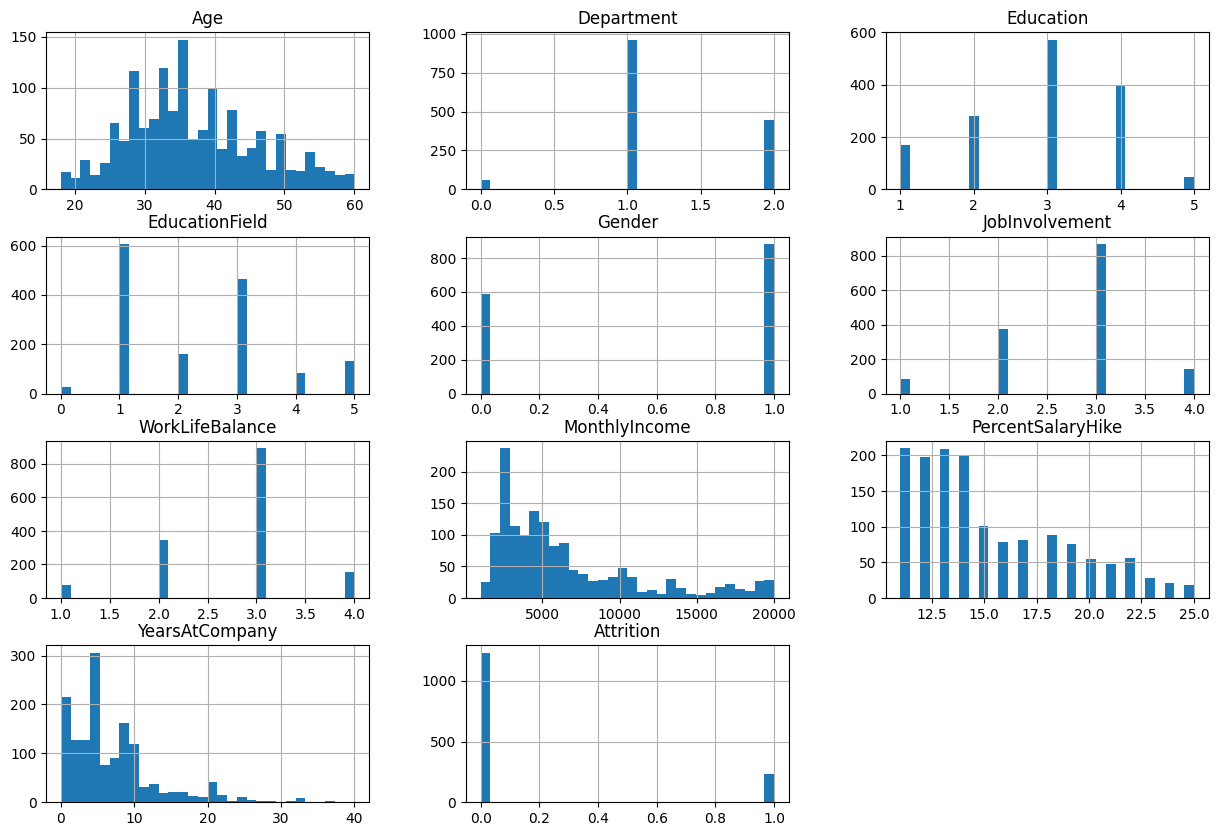

In [ ]:
new_df.hist(bins=30,figsize=(15,10))
plt.show

<Axes: >

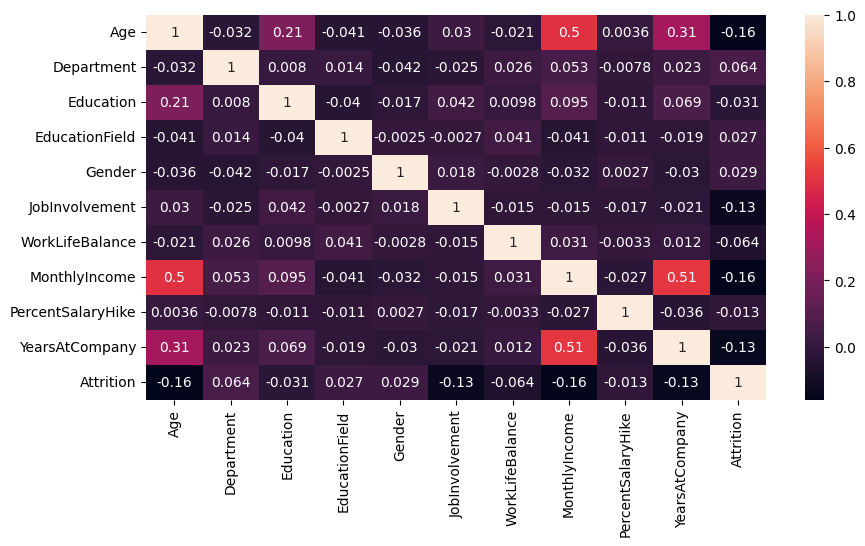

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(data=new_df.corr(),annot=True)

In [ ]:
new_df.corr()

,Age,Department,Education,EducationField,Gender,JobInvolvement,WorkLifeBalance,MonthlyIncome,PercentSalaryHike,YearsAtCompany,Attrition
Age,1.000000,-0.031882,0.208034,-0.040873,-0.036311,0.029820,-0.021490,0.497855,0.003634,0.311309,-0.159205
Department,-0.031882,1.000000,0.007996,0.013720,-0.041583,-0.024586,0.026383,0.053130,-0.007840,0.022920,0.063991
Education,0.208034,0.007996,1.000000,-0.039592,-0.016547,0.042438,0.009819,0.094961,-0.011111,0.069114,-0.031373
EducationField,-0.040873,0.013720,-0.039592,1.000000,-0.002504,-0.002655,0.041191,-0.041070,-0.011214,-0.018692,0.026846
Gender,-0.036311,-0.041583,-0.016547,-0.002504,1.000000,0.017960,-0.002753,-0.031858,0.002733,-0.029747,0.029453
JobInvolvement,0.029820,-0.024586,0.042438,-0.002655,0.017960,1.000000,-0.014617,-0.015271,-0.017205,-0.021355,-0.130016
WorkLifeBalance,-0.021490,0.026383,0.009819,0.041191,-0.002753,-0.014617,1.000000,0.030683,-0.003280,0.012089,-0.063939
MonthlyIncome,0.497855,0.053130,0.094961,-0.041070,-0.031858,-0.015271,0.030683,1.000000,-0.027269,0.514285,-0.159840
PercentSalaryHike,0.003634,-0.007840,-0.011111,-0.011214,0.002733,-0.017205,-0.003280,-0.027269,1.000000,-0.035991,-0.013478
YearsAtCompany,0.311309,0.022920,0.069114,-0.018692,-0.029747,-0.021355,0.012089,0.514285,-0.035991,1.000000,-0.134392


In [ ]:
from sklearn.model_selection import train_test_split

input_data=new_df.drop(columns=['Attrition'])
output_data=new_df[['Attrition']]

x_train,x_test,y_train,y_test=train_test_split(input_data,output_data,test_size=0.20,random_state=70)

In [ ]:
output_data.value_counts()

Attrition
0            1233
1             237
Name: count, dtype: int64

In [ ]:
y_test.value_counts(),y_train.value_counts()

(Attrition
 0            238
 1             56
 Name: count, dtype: int64,
 Attrition
 0            995
 1            181
 Name: count, dtype: int64)

In [ ]:



from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:

model_param={
    'tree':{
        'model':DecisionTreeClassifier(),
        'param':{
        'criterion':['gini', 'entropy', 'log_loss'],
        'splitter':['best', 'random'],
        'max_depth':[1,2,3,4,5]}
    },
    'random':{
        'model':RandomForestClassifier(),
        'param':{
        'n_estimators':[8,16,32,64,128,256],
        'criterion':['gini', 'entropy', 'log_loss'],
        'max_depth':[3,5,7,9,8,2],
        'max_features':['sqrt','log2']}
    },
    'knn':{
        'model':KNeighborsClassifier(),
        'param':{
        'n_neighbors':[3,5,7,9,10,2],
        'weights':['uniform', 'distance'],
        'leaf_size':[2,3,4,5,6,7,8.,9]    
        }
    },
    "svm":{
        'model':SVC(),
        'param':{
        
        'C':[1,1.5,3,5,8],
        'gamma':['scale', 'auto',1,1.1,0.1,0.5],
        'degree':[3,5,7,9,2]}}

}


In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
best_models={}
for model_name,mp in model_param.items():
    gr=RandomizedSearchCV(
        estimator=mp['model'],
        param_distributions=mp['param'],
        cv=5,
        n_jobs=-1,
        verbose=1,
        n_iter=10
    )
    gr.fit(x_train,y_train)
    best_models[model_name] = {
        'best_params': gr.best_params_,
        'best_score': gr.best_score_*100
    }

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\suraj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\suraj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\suraj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\suraj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\suraj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py

In [ ]:
# Print best models
for model, details in best_models.items():
    print(f"Best model for {model}:")
    print(f"Params: {details['best_params']}, Accuracy: {details['best_score']:.2f}%")

Best model for tree:
Params: {'splitter': 'random', 'max_depth': 1, 'criterion': 'entropy'}, Accuracy: 84.61%
Best model for random:
Params: {'n_estimators': 256, 'max_features': 'log2', 'max_depth': 8, 'criterion': 'log_loss'}, Accuracy: 85.03%
Best model for knn:
Params: {'weights': 'uniform', 'n_neighbors': 9, 'leaf_size': 2}, Accuracy: 83.67%
Best model for svm:
Params: {'gamma': 1, 'degree': 2, 'C': 8}, Accuracy: 84.61%


In [ ]:
rd=RandomForestClassifier(n_estimators=128,max_features='sqrt',criterion='log_loss',max_depth=5,random_state=70)
rd.fit(x_train,y_train)
rd.predict(x_test)
train=rd.score(x_train,y_train)
test=rd.score(x_test,y_test)
diff= (train)-(test)
print(f' train_data_accuracy : {train*100:.1f}\n test_data_accuracy  : {test*100:.1f}\n diff train or test  : {diff*100:.1f}'  )

: 